<a href="https://colab.research.google.com/github/pravin-raut/MachineLearning/blob/Master/dissertation/01_Arima_Oil%26Currency.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 01. Installing Libraries


In [1]:
!pip install quandl
!pip install yfinance
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Importing required libraries


In [2]:
import yfinance as yf
import pandas as pd
from datetime import datetime,timedelta
import quandl
import json

# Required configuration file which has secret API Key

In [3]:
import urllib.request

file_path = "https://raw.githubusercontent.com/pravin-raut/MachineLearning/Master/dissertation/Config_Git.json"

# Open the file for reading and load the data from it
with urllib.request.urlopen(file_path) as infile:
  data = json.load(infile)
# Set up API key
  api_key=data["nasdaq"]["api_key"]
quandl.ApiConfig.api_key = api_key


In [4]:
CurrentDate = (datetime.today() - timedelta(days=0)).strftime('%Y-%m-%d')
CurrentDate

'2023-06-20'

In [5]:
DayBefore1000 = (datetime.today() - timedelta(days=2000)).strftime('%Y-%m-%d')
DayBefore1000


'2017-12-28'

# Data Collection & Preparation

In [6]:
def getDataFromAPI(API,symbol,start_date,end_date):

  if API=="YFinance":
    # Create a ticker object
    ticker = yf.Ticker(symbol)
    # Download historical data
    data = ticker.history(period="1d", start=start_date, end=end_date)

  if API=="Nasdaq":
    data = quandl.get(symbol,start_date=start_date,end_date=end_date)


  return data

In [7]:
OilPriceInUSD=getDataFromAPI("Nasdaq","OPEC/ORB",DayBefore1000,CurrentDate).reset_index()
OilPriceInUSD['Date'] = pd.to_datetime(OilPriceInUSD['Date']).dt.date
OilPriceInUSD.set_index('Date', inplace=True)
OilPriceInUSD

,Value
Date,
2017-12-28,64.17
2017-12-29,64.47
2018-01-02,64.84
2018-01-03,65.13
2018-01-04,66.13
...,...
2023-06-12,72.96
2023-06-13,73.06
2023-06-14,74.84


In [8]:
EuroPriceInUSD=getDataFromAPI("YFinance","EURUSD=X",DayBefore1000,CurrentDate).reset_index()
EuroPriceInUSD['Date'] = pd.to_datetime(EuroPriceInUSD['Date']).dt.date
EuroPriceInUSD.set_index('Date', inplace=True)
EuroPriceInUSD

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2017-12-28,1.190023,1.195500,1.189825,1.190079,0,0.0,0.0
2017-12-29,1.193987,1.202284,1.193802,1.194172,0,0.0,0.0
2018-01-01,1.200495,1.201504,1.199904,1.200495,0,0.0,0.0
2018-01-02,1.201086,1.208094,1.200855,1.201158,0,0.0,0.0
2018-01-03,1.206200,1.206709,1.200495,1.206345,0,0.0,0.0
...,...,...,...,...,...,...,...
2023-06-13,1.076299,1.082251,1.076056,1.076299,0,0.0,0.0
2023-06-14,1.078935,1.085835,1.077575,1.078935,0,0.0,0.0
2023-06-15,1.084305,1.093853,1.080427,1.084305,0,0.0,0.0


In [9]:
data=EuroPriceInUSD.merge(OilPriceInUSD, on='Date', how='inner').reset_index()
data

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Value
0,2017-12-28,1.190023,1.195500,1.189825,1.190079,0,0.0,0.0,64.17
1,2017-12-29,1.193987,1.202284,1.193802,1.194172,0,0.0,0.0,64.47
2,2018-01-02,1.201086,1.208094,1.200855,1.201158,0,0.0,0.0,64.84
3,2018-01-03,1.206200,1.206709,1.200495,1.206345,0,0.0,0.0,65.13
4,2018-01-04,1.201129,1.209190,1.200495,1.201043,0,0.0,0.0,66.13
...,...,...,...,...,...,...,...,...,...
1403,2023-06-12,1.075095,1.078970,1.073434,1.075095,0,0.0,0.0,72.96
1404,2023-06-13,1.076299,1.082251,1.076056,1.076299,0,0.0,0.0,73.06
1405,2023-06-14,1.078935,1.085835,1.077575,1.078935,0,0.0,0.0,74.84
1406,2023-06-15,1.084305,1.093853,1.080427,1.084305,0,0.0,0.0,74.20


In [10]:
selected_data = data[['Date', 'Close', 'Value']]
selected_data = selected_data.rename(columns={'Close': 'USD_EUR_Price', 'Value': 'Oil_Price'})
selected_data['Date'] = pd.to_datetime(selected_data['Date'])
selected_data.set_index('Date', inplace=True)
selected_data

,USD_EUR_Price,Oil_Price
Date,,
2017-12-28,1.190079,64.17
2017-12-29,1.194172,64.47
2018-01-02,1.201158,64.84
2018-01-03,1.206345,65.13
2018-01-04,1.201043,66.13
...,...,...
2023-06-12,1.075095,72.96
2023-06-13,1.076299,73.06
2023-06-14,1.078935,74.84


In [11]:
selected_data['USD_EUR_Price'].describe()


count    1408.000000
mean        1.131363
std         0.059926
min         0.959619
25%         1.095999
50%         1.131388
75%         1.177551
max         1.251001
Name: USD_EUR_Price, dtype: float64

In [12]:
selected_data['Oil_Price'].describe()


count    1408.000000
mean       69.929240
std        20.244819
min        12.220000
25%        60.660000
50%        69.435000
75%        79.940000
max       128.270000
Name: Oil_Price, dtype: float64

# Data Visualization

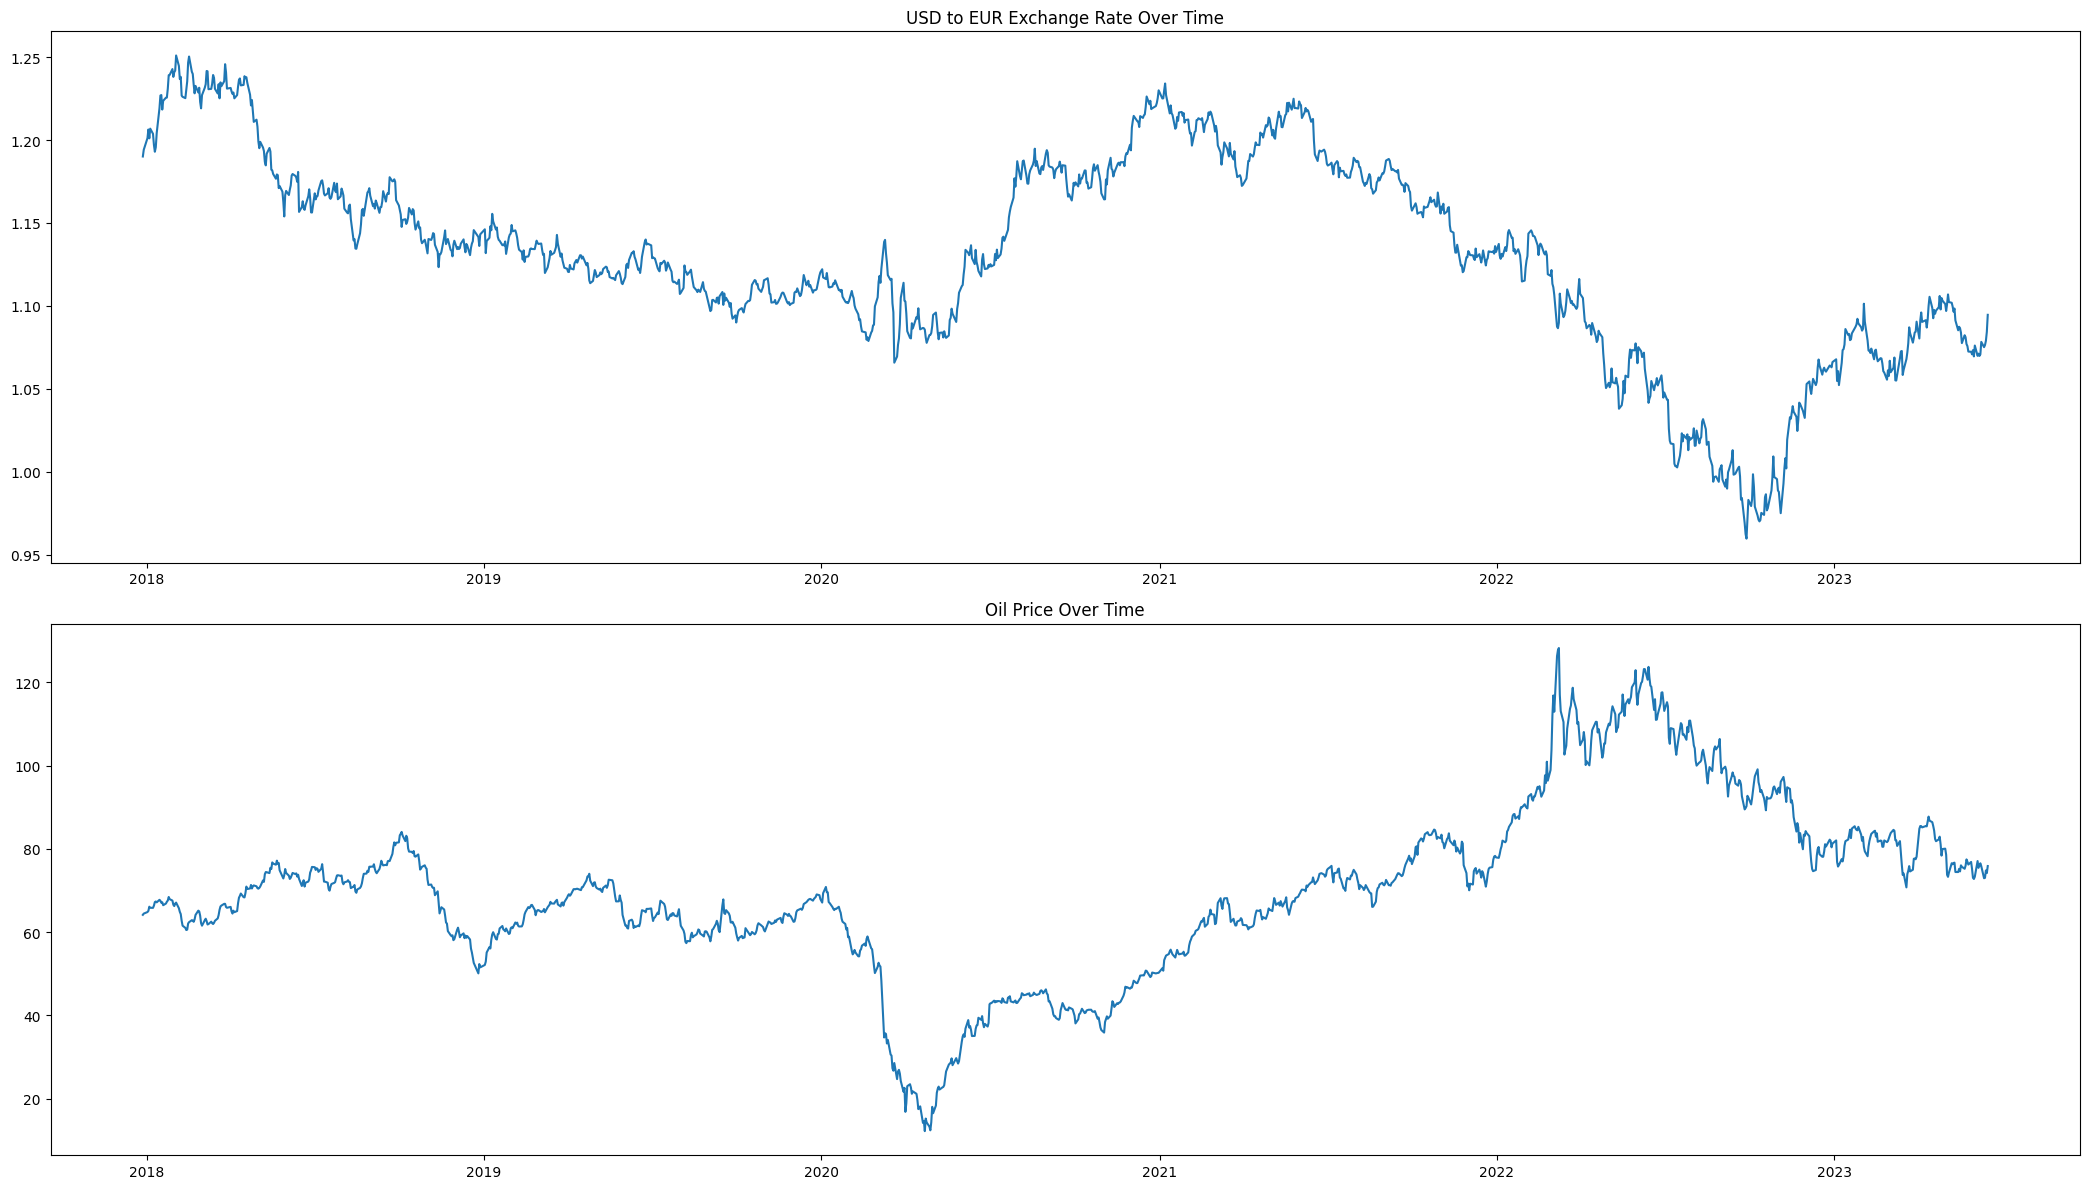

In [13]:
import matplotlib.pyplot as plt

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(21, 12))

# Plot the first chart on the first subplot
ax1.plot(selected_data.index, selected_data['USD_EUR_Price'])
ax1.set_title('USD to EUR Exchange Rate Over Time')

# Plot the second chart on the second subplot
ax2.plot(selected_data.index, selected_data['Oil_Price'])
ax2.set_title('Oil Price Over Time')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure with both charts
plt.show()


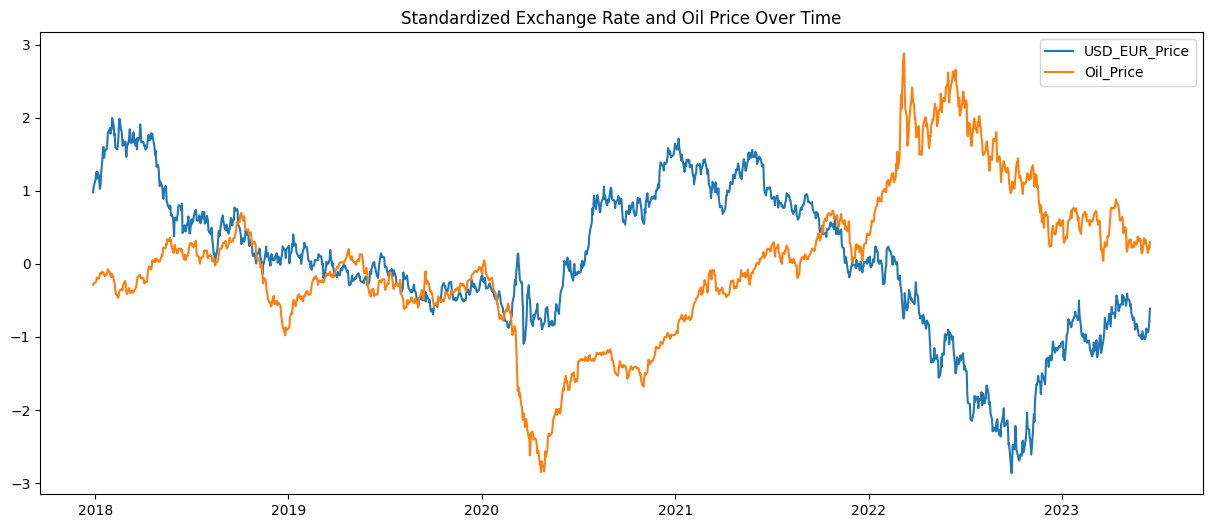

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

selected_data['USD_EUR_Price_standardized'] = (selected_data['USD_EUR_Price'] - selected_data['USD_EUR_Price'].mean()) / selected_data['USD_EUR_Price'].std()
selected_data['Oil_Price_standardized'] = (selected_data['Oil_Price'] - selected_data['Oil_Price'].mean()) / selected_data['Oil_Price'].std()

fig, ax = plt.subplots(figsize=(15, 6))

ax.plot(selected_data.index, selected_data['USD_EUR_Price_standardized'], label='USD_EUR_Price')
ax.plot(selected_data.index, selected_data['Oil_Price_standardized'], label='Oil_Price')

ax.set_title('Standardized Exchange Rate and Oil Price Over Time')
ax.legend()

plt.show()


# Data Stationary Prepartion

In [15]:
from statsmodels.tsa.stattools import adfuller

def check_stationarity(data, column):
    # 1. Perform Augmented Dickey-Fuller test on the original data
    result_original = adfuller(data[column])
    adf_statistic_original = result_original[0]
    p_value_original = result_original[1]
    print('ADF Statistic (Original Data): %f' % adf_statistic_original)
    print('p-value (Original Data): %f' % p_value_original)

    if p_value_original <= 0.05:
        print("Null hypothesis of stationarity is rejected for the original data.")
    else:
        print("Null hypothesis of stationarity holds true for the original data.")

    # 2. Perform Augmented Dickey-Fuller test on the differenced data
    data_diff = data[column].diff(1).dropna()
    result_diff = adfuller(data_diff)
    adf_statistic_diff = result_diff[0]
    p_value_diff = result_diff[1]
    print('ADF Statistic (Differenced Data): %f' % adf_statistic_diff)
    print('p-value (Differenced Data): %f' % p_value_diff)

    if p_value_diff <= 0.05:
        print("Null hypothesis of stationarity is rejected for the differenced data.")
    else:
        print("Null hypothesis of stationarity holds true for the differenced data.")




In [16]:
check_stationarity(selected_data, 'USD_EUR_Price')


ADF Statistic (Original Data): -1.691779
p-value (Original Data): 0.435353
Null hypothesis of stationarity holds true for the original data.
ADF Statistic (Differenced Data): -36.233212
p-value (Differenced Data): 0.000000
Null hypothesis of stationarity is rejected for the differenced data.


In [17]:
check_stationarity(selected_data, 'Oil_Price')


ADF Statistic (Original Data): -1.806590
p-value (Original Data): 0.377195
Null hypothesis of stationarity holds true for the original data.
ADF Statistic (Differenced Data): -7.514556
p-value (Differenced Data): 0.000000
Null hypothesis of stationarity is rejected for the differenced data.


In [18]:
selected_data = selected_data.drop(['USD_EUR_Price_standardized', 'Oil_Price_standardized'], axis=1)
selected_data

,USD_EUR_Price,Oil_Price
Date,,
2017-12-28,1.190079,64.17
2017-12-29,1.194172,64.47
2018-01-02,1.201158,64.84
2018-01-03,1.206345,65.13
2018-01-04,1.201043,66.13
...,...,...
2023-06-12,1.075095,72.96
2023-06-13,1.076299,73.06
2023-06-14,1.078935,74.84


In [19]:
from pmdarima.arima.utils import ndiffs

In [20]:
ndiffs(selected_data.USD_EUR_Price,test="adf")

1

In [21]:
ndiffs(selected_data.Oil_Price,test="adf")

1

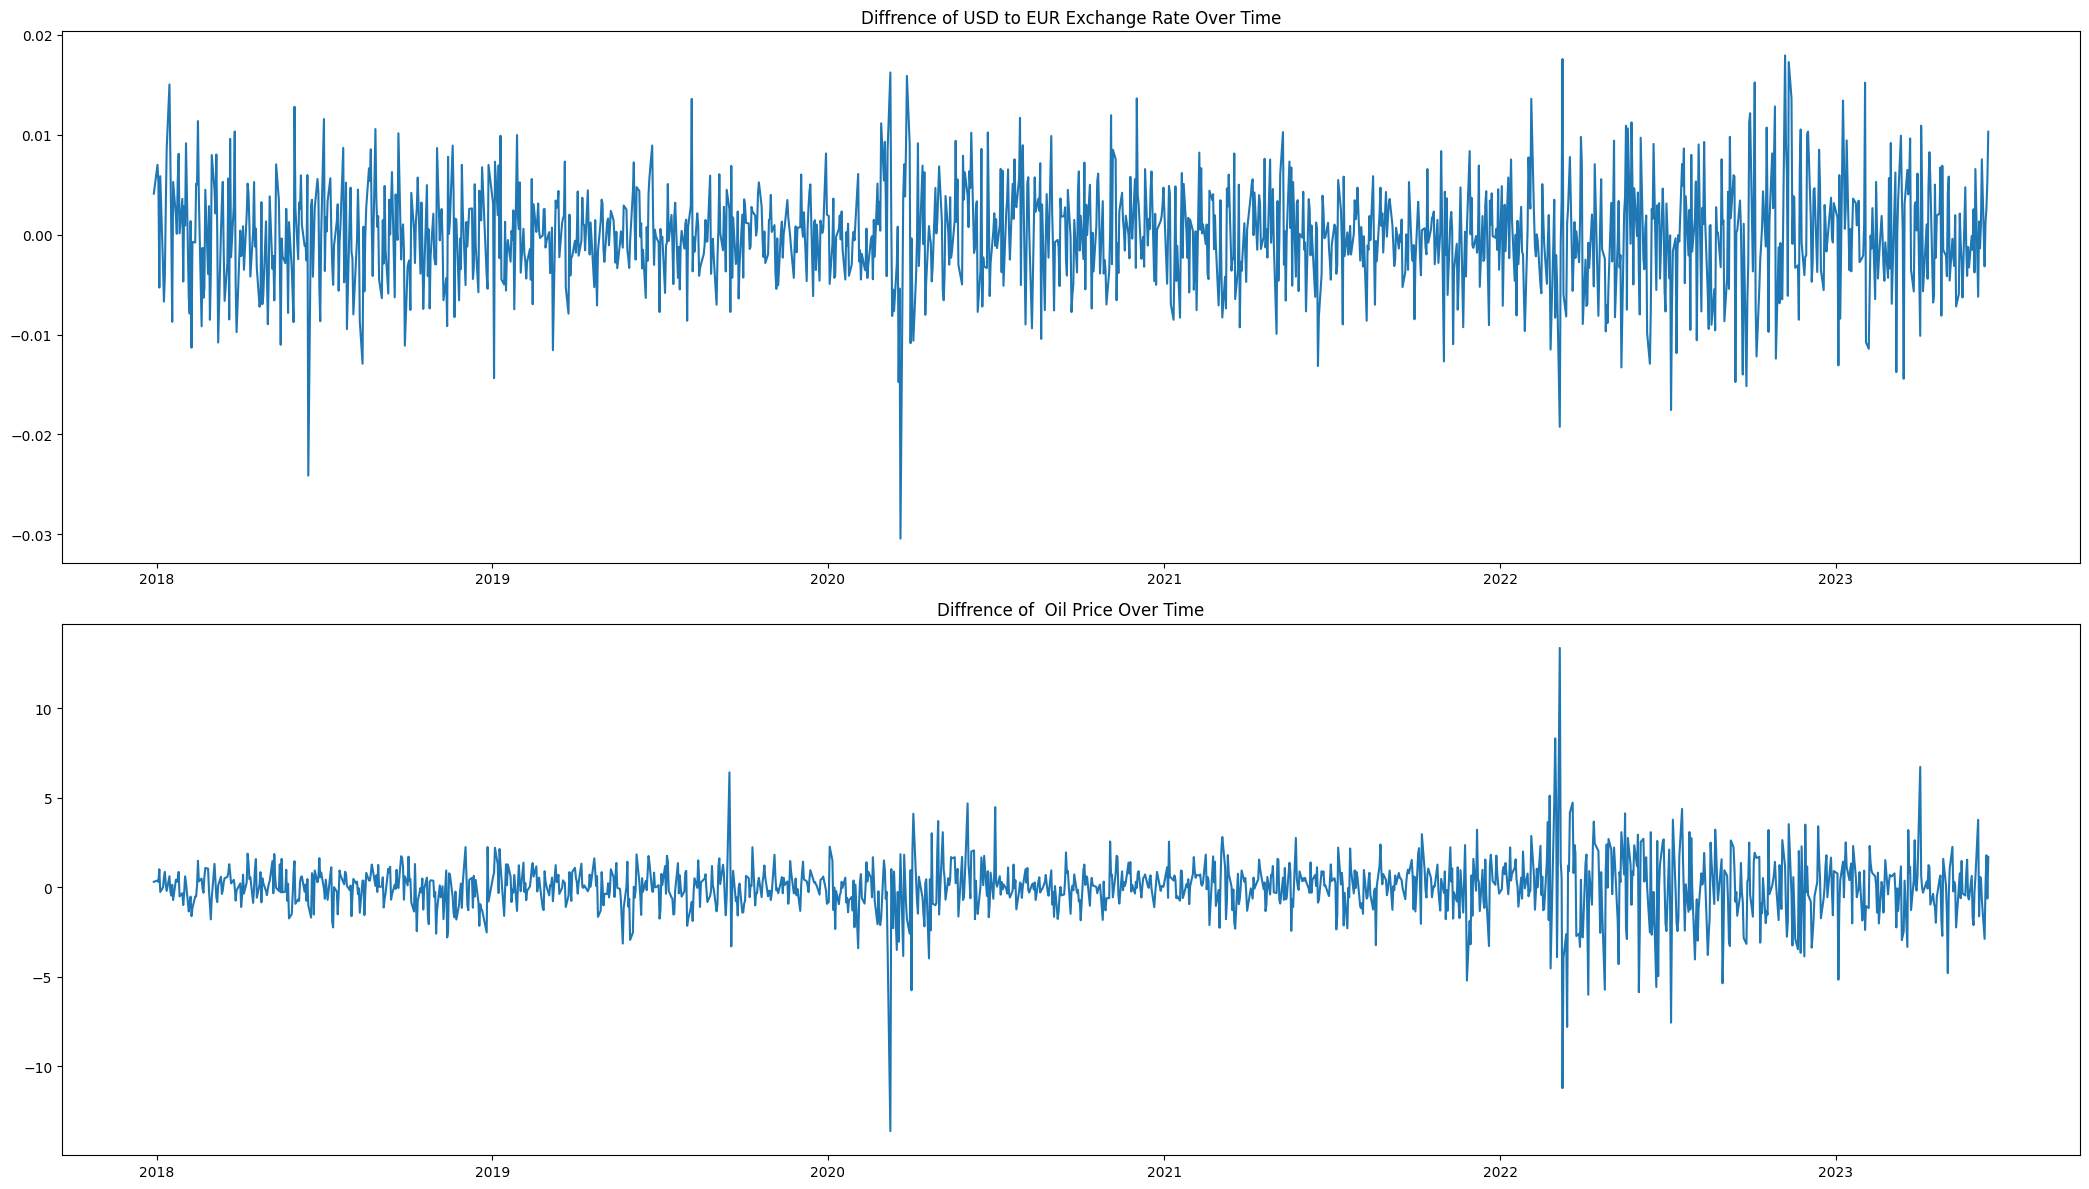

In [22]:
import matplotlib.pyplot as plt

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(21, 12))

# Plot the first chart on the first subplot
ax1.plot(selected_data.index, selected_data['USD_EUR_Price'].diff())
ax1.set_title('Diffrence of USD to EUR Exchange Rate Over Time')

# Plot the second chart on the second subplot
ax2.plot(selected_data.index, selected_data['Oil_Price'].diff())
ax2.set_title('Diffrence of  Oil Price Over Time')

# Adjust spacing between subplots
plt.tight_layout()

# Display the figure with both charts
plt.show()


# Training & Testing Data Splitting

In [23]:
# Perform an 80-20 split for training and testing
train_data_size = int(0.8 * len(selected_data))
train_data = selected_data.iloc[:train_data_size]
test_data = selected_data.iloc[train_data_size:]

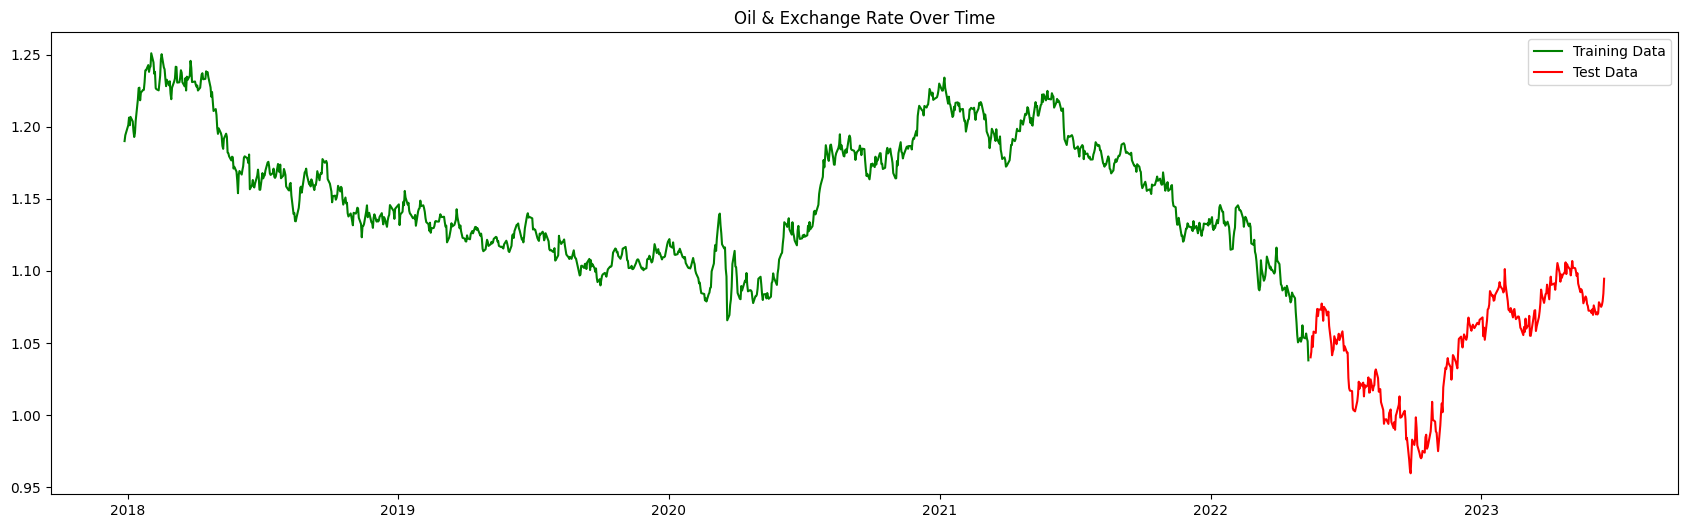

In [24]:
import matplotlib.pyplot as plt

# Plotting the entire data
plt.figure(figsize=(21, 6))

# Plotting the training data
plt.plot(train_data.index, train_data['USD_EUR_Price'], color='green', label='Training Data')

# Plotting the test data
plt.plot(test_data.index, test_data['USD_EUR_Price'], color='red', label='Test Data')

plt.title('Oil & Exchange Rate Over Time')
plt.legend()
plt.show()


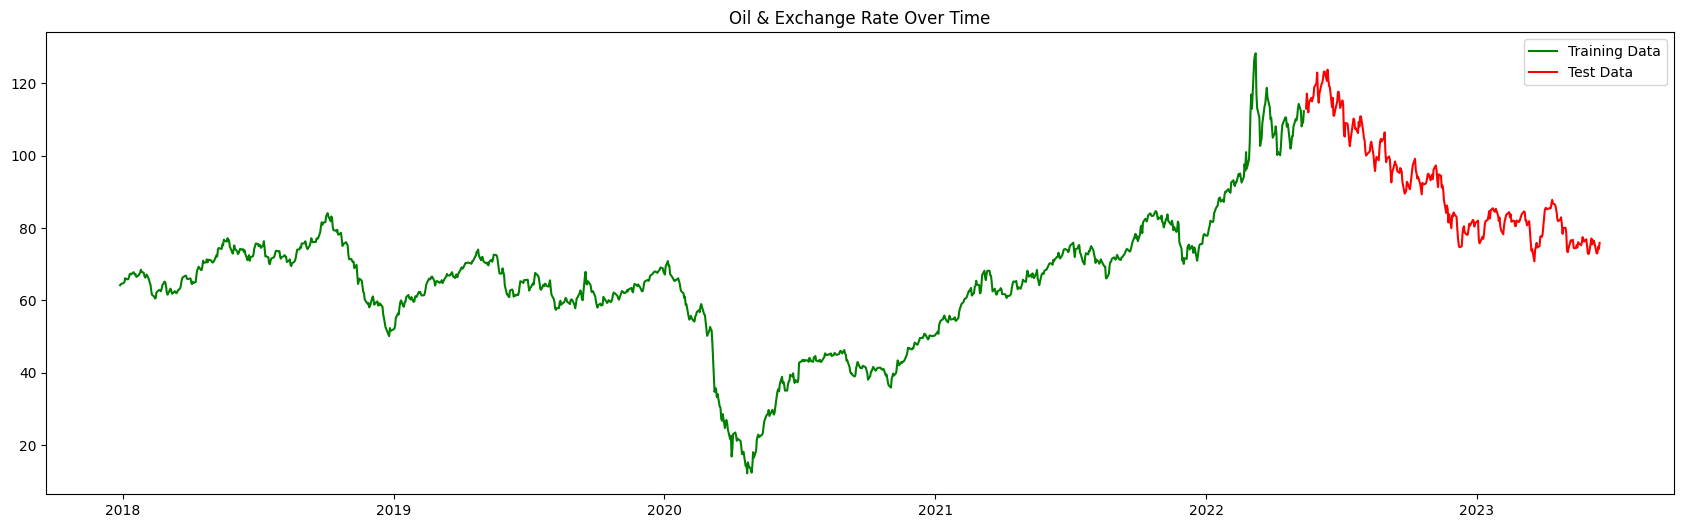

In [25]:
import matplotlib.pyplot as plt

# Plotting the entire data
plt.figure(figsize=(21, 6))

# Plotting the training data
plt.plot(train_data.index, train_data['Oil_Price'], color='green', label='Training Data')

# Plotting the test data
plt.plot(test_data.index, test_data['Oil_Price'], color='red', label='Test Data')

plt.title('Oil & Exchange Rate Over Time')
plt.legend()
plt.show()


In [26]:
print('Training data shape: ', train_data.shape)
print('Test data shape: ', test_data.shape)

Training data shape:  (1126, 2)
Test data shape:  (282, 2)


#Check ACF and PACF  values

In [27]:
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

def plot_acf_values(data, lags):
    fig, ax = plt.subplots(figsize=(12, 4))
    plot_acf(data.dropna(), lags=lags, ax=ax)
    plt.title('ACF')
    plt.show()

def plot_pacf_values(data, lags):
    fig, ax = plt.subplots(figsize=(12, 4))
    plot_pacf(data.dropna(), lags=lags, ax=ax)
    plt.title('PACF')
    plt.show()



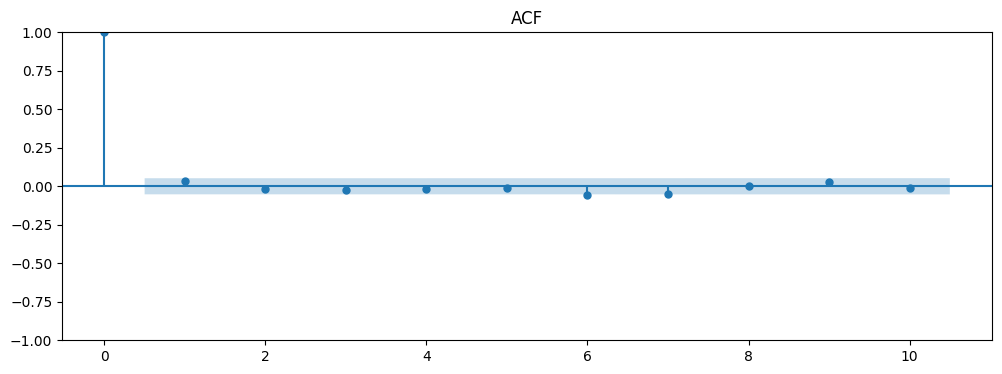

In [52]:

plot_acf_values(selected_data['USD_EUR_Price'].diff().dropna(), lags=10)
#Their is no considerbale point which is well outside the blue line , hence its difficult to pick value of P

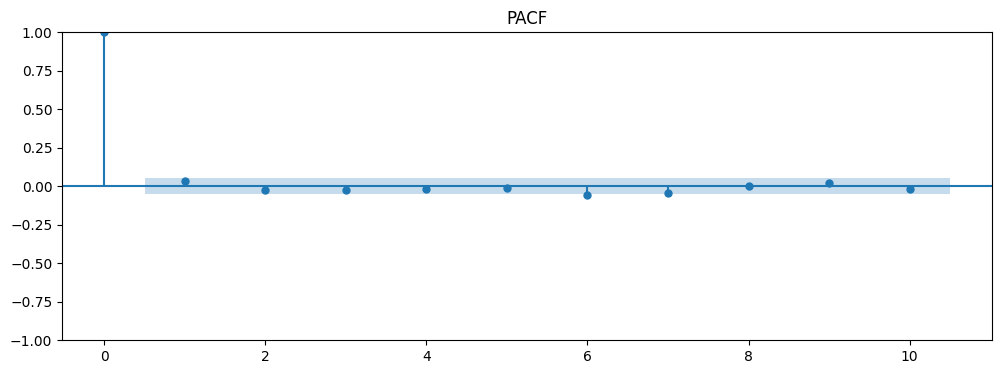

In [53]:
plot_pacf_values(selected_data['USD_EUR_Price'].diff().dropna(), lags=10)
#Their is no considerbale point which is well outside the blue line , hence its difficult to pick value of q

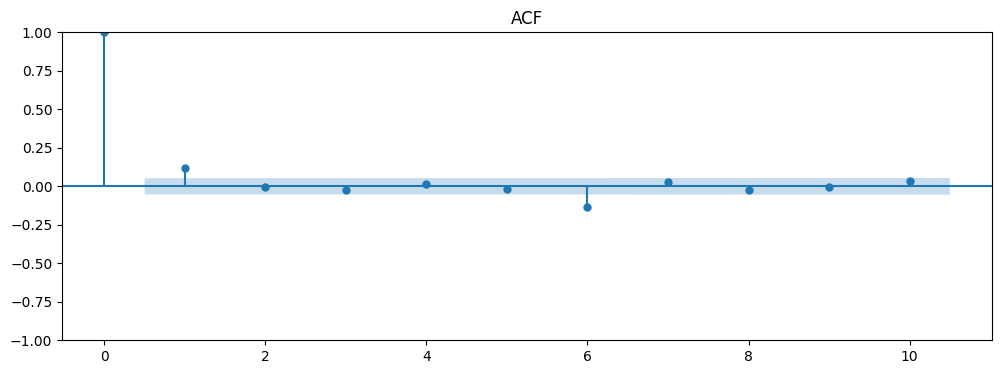

In [54]:
plot_acf_values(selected_data['Oil_Price'].diff().dropna(), lags=10)
#P can be 1 as it well out side the line

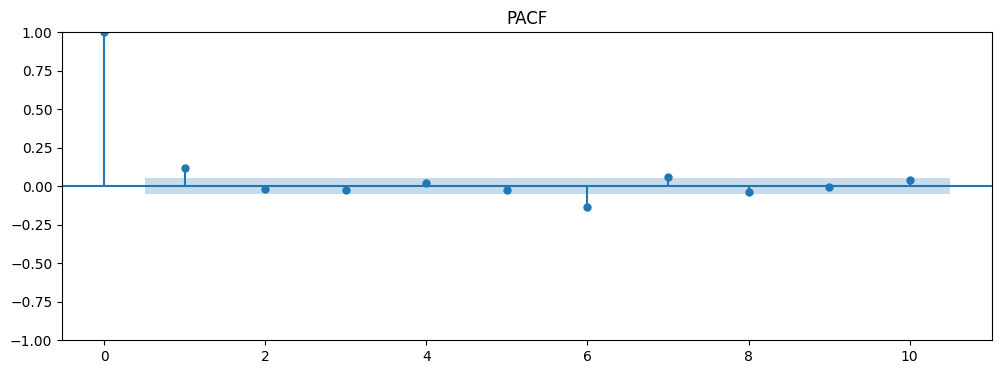

In [55]:
plot_pacf_values(selected_data['Oil_Price'].diff().dropna(), lags=10)
#Q can be 1 as it well out side the line

# Trying Auto Arima to see if it can provide any other value for P,D,Q

In [30]:
from pmdarima import auto_arima

# Fit auto_arima function
model = auto_arima(selected_data['USD_EUR_Price'],
                   start_p=2, start_q=0,
                   max_p=10, max_q=10, m=12,
                   start_P=2, seasonal=False,
                   d=1, D=1, trace=True,
                   error_action='ignore',  # don't want to know if an order does not work
                   suppress_warnings=True,  # don't want convergence warnings
                   stepwise=True)  # set to stepwise

# Print model summary
print(model.summary())


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


Performing stepwise search to minimize aic
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=-10848.610, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=-10850.473, Time=0.40 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=-10849.939, Time=0.39 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=-10850.001, Time=1.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=-10852.225, Time=0.22 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=-10848.150, Time=1.21 sec

Best model:  ARIMA(0,1,0)(0,0,0)[0]          
Total fit time: 3.686 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 1408
Model:               SARIMAX(0, 1, 0)   Log Likelihood                5427.112
Date:                Tue, 20 Jun 2023   AIC                         -10852.225
Time:                        06:45:38   BIC                         -10846.976
Sample:                             0   HQIC                        -10850.26

In [31]:
from pmdarima import auto_arima

# Fit auto_arima function
model = auto_arima(selected_data['Oil_Price'],
                   start_p=2, start_q=0,
                   max_p=10, max_q=10, m=12,
                   start_P=2, seasonal=False,
                   d=1, D=1, trace=True,
                   error_action='ignore',  # don't want to know if an order does not work
                   suppress_warnings=True,  # don't want convergence warnings
                   stepwise=True)  # set to stepwise

# Print model summary
print(model.summary())


Performing stepwise search to minimize aic


/usr/local/lib/python3.10/dist-packages/pmdarima/arima/_validation.py:62: UserWarning: m (12) set for non-seasonal fit. Setting to 0
  warnings.warn("m (%i) set for non-seasonal fit. Setting to 0" % m)


 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=5240.472, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=5257.401, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=5239.019, Time=0.23 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=5238.643, Time=0.35 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=5255.441, Time=0.10 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=5240.639, Time=0.69 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=5240.638, Time=0.45 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=5242.643, Time=0.55 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=5236.676, Time=0.12 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=5238.673, Time=0.27 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=5238.671, Time=0.17 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=5237.052, Time=0.11 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=5240.676, Time=0.31 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 3.805 seconds
                               SARIMAX Results                   

# ARIMA Model calling

In [32]:
from statsmodels.tsa.arima.model import ARIMA


In [33]:

cur_model=ARIMA(train_data['USD_EUR_Price'],order=(1,1,1),exog=train_data['Oil_Price'])
cur_model_fit=cur_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [34]:

oil_model=ARIMA(train_data['Oil_Price'],order=(1,1,1))
oil_model_fit=oil_model.fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


#ARIMA model output (Need to understand)

In [35]:
cur_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:          USD_EUR_Price   No. Observations:                 1126
Model:                 ARIMA(1, 1, 1)   Log Likelihood                4420.313
Date:                Tue, 20 Jun 2023   AIC                          -8832.626
Time:                        06:45:43   BIC                          -8812.523
Sample:                             0   HQIC                         -8825.029
                               - 1126                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Oil_Price     -0.0002   5.96e-05     -4.162      0.000      -0.000      -0.000
ar.L1         -0.1809      0.562     -0.322      0.748      -1.283       0.921
ma.L1          0.2261      0.559      0.404      0.686      -0.870       1.322
sigma2      2.259e-05   7.12e-07     31.737      0.000    2.12e-05     2.4e-05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):               203.69
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.88   Skew:                            -0.30
Prob(H) (two-sided):                  0.21   Kurtosis:                         5.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [36]:
oil_model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Oil_Price   No. Observations:                 1126
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1997.961
Date:                Tue, 20 Jun 2023   AIC                           4001.922
Time:                        06:45:43   BIC                           4016.998
Sample:                             0   HQIC                          4007.619
                               - 1126                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2752      0.097      2.829      0.005       0.085       0.466
ma.L1         -0.1360      0.097     -1.408      0.159      -0.325       0.053
sigma2         2.0422      0.028     74.241      0.000       1.988       2.096
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             17936.28
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):               3.96   Skew:                            -0.47
Prob(H) (two-sided):                  0.00   Kurtosis:                        22.54
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

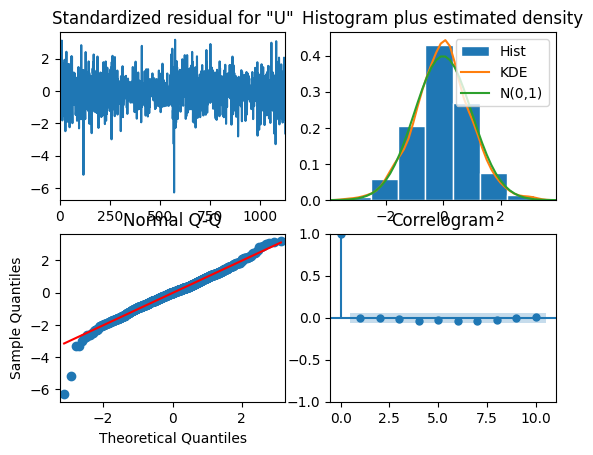

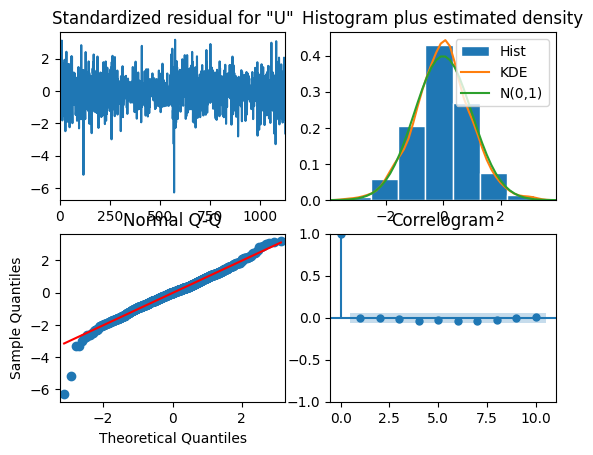

In [37]:
cur_model_fit.plot_diagnostics()

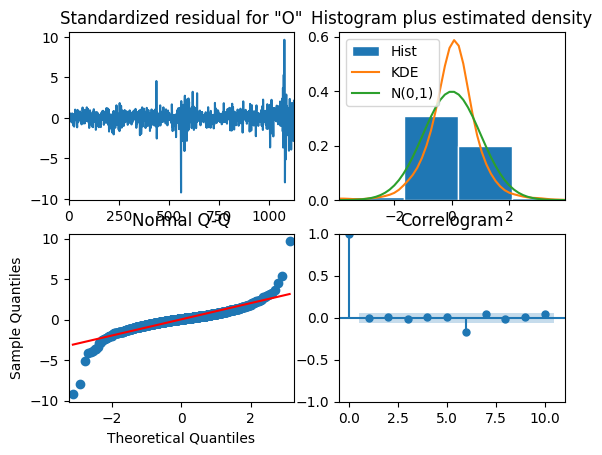

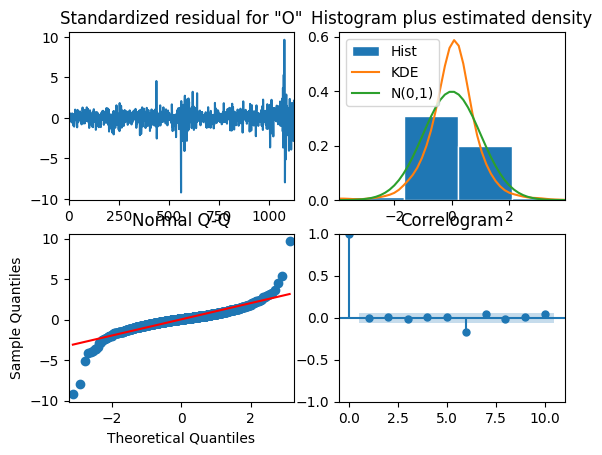

In [38]:
oil_model_fit.plot_diagnostics()

# Forecasting on Test Data for Oil

In [39]:
forecast_oil = oil_model_fit.get_forecast(steps=len(test_data))

# Create a new dataframe to hold the forecast
df_forecast_oil = forecast_oil.conf_int()

# Create a new column for the forecasted values
df_forecast_oil['Oil forecast'] = forecast_oil.predicted_mean

df_forecast_oil

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,lower Oil_Price,upper Oil_Price,Oil forecast
1126,109.902568,115.504373,112.703471
1127,108.576882,117.068672,112.822777
1128,107.479094,118.232135,112.855615
1129,106.541509,119.187796,112.864653
1130,105.717908,120.016373,112.867140
...,...,...,...
1403,57.234881,168.501289,112.868085
1404,57.134761,168.601409,112.868085
1405,57.034821,168.701349,112.868085
1406,56.935059,168.801111,112.868085


# Forecasting on Test Data for Currency

In [40]:
forecast_cur = cur_model_fit.get_forecast(steps=len(test_data),exog=test_data['Oil_Price'])

# Create a new dataframe to hold the forecast
df_forecas_cur = forecast_cur.conf_int()

# Create a new column for the forecasted values
df_forecas_cur['Currency forecast'] = forecast_cur.predicted_mean

df_forecas_cur

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


,lower USD_EUR_Price,upper USD_EUR_Price,Currency forecast
1126,1.027911,1.046544,1.037228
1127,1.022829,1.049782,1.036306
1128,1.020266,1.053430,1.036848
1129,1.018373,1.056769,1.037571
1130,1.015391,1.058386,1.036888
...,...,...,...
1403,0.885975,1.208508,1.047242
1404,0.885661,1.208773,1.047217
1405,0.884930,1.208621,1.046775
1406,0.884800,1.209068,1.046934


In [41]:
# Create a DataFrame for predicted values with a date column
predicted_df = pd.DataFrame({'Date': test_data.index, 'Cur_Predicted_Value': df_forecas_cur['Currency forecast'] ,'Cur lower': df_forecas_cur['lower USD_EUR_Price'],'Cur Upper':df_forecas_cur['upper USD_EUR_Price']
                             ,'Oil_Predicted_Value': df_forecast_oil['Oil forecast'] ,'Oil lower': df_forecast_oil['lower Oil_Price'],'Oil Upper':df_forecast_oil['upper Oil_Price']
                             })
predicted_df.set_index('Date', inplace=True)
predicted_df

,Cur_Predicted_Value,Cur lower,Cur Upper,Oil_Predicted_Value,Oil lower,Oil Upper
Date,,,,,,
2022-05-16,1.037228,1.027911,1.046544,112.703471,109.902568,115.504373
2022-05-17,1.036306,1.022829,1.049782,112.822777,108.576882,117.068672
2022-05-18,1.036848,1.020266,1.053430,112.855615,107.479094,118.232135
2022-05-19,1.037571,1.018373,1.056769,112.864653,106.541509,119.187796
2022-05-20,1.036888,1.015391,1.058386,112.867140,105.717908,120.016373
...,...,...,...,...,...,...
2023-06-12,1.047242,0.885975,1.208508,112.868085,57.234881,168.501289
2023-06-13,1.047217,0.885661,1.208773,112.868085,57.134761,168.601409
2023-06-14,1.046775,0.884930,1.208621,112.868085,57.034821,168.701349


#Combining predicted data with actual test data

In [42]:
# Merge the predicted DataFrame with the test data
combined_data = test_data.merge(predicted_df, left_index=True, right_index=True)
combined_data

,USD_EUR_Price,Oil_Price,Cur_Predicted_Value,Cur lower,Cur Upper,Oil_Predicted_Value,Oil lower,Oil Upper
Date,,,,,,,,
2022-05-16,1.040063,112.98,1.037228,1.027911,1.046544,112.703471,109.902568,115.504373
2022-05-17,1.043896,117.10,1.036306,1.022829,1.049782,112.822777,108.576882,117.068672
2022-05-18,1.054786,114.84,1.036848,1.020266,1.053430,112.855615,107.479094,118.232135
2022-05-19,1.047274,111.94,1.037571,1.018373,1.056769,112.864653,106.541509,119.187796
2022-05-20,1.057899,114.69,1.036888,1.015391,1.058386,112.867140,105.717908,120.016373
...,...,...,...,...,...,...,...,...
2023-06-12,1.075095,72.96,1.047242,0.885975,1.208508,112.868085,57.234881,168.501289
2023-06-13,1.076299,73.06,1.047217,0.885661,1.208773,112.868085,57.134761,168.601409
2023-06-14,1.078935,74.84,1.046775,0.884930,1.208621,112.868085,57.034821,168.701349


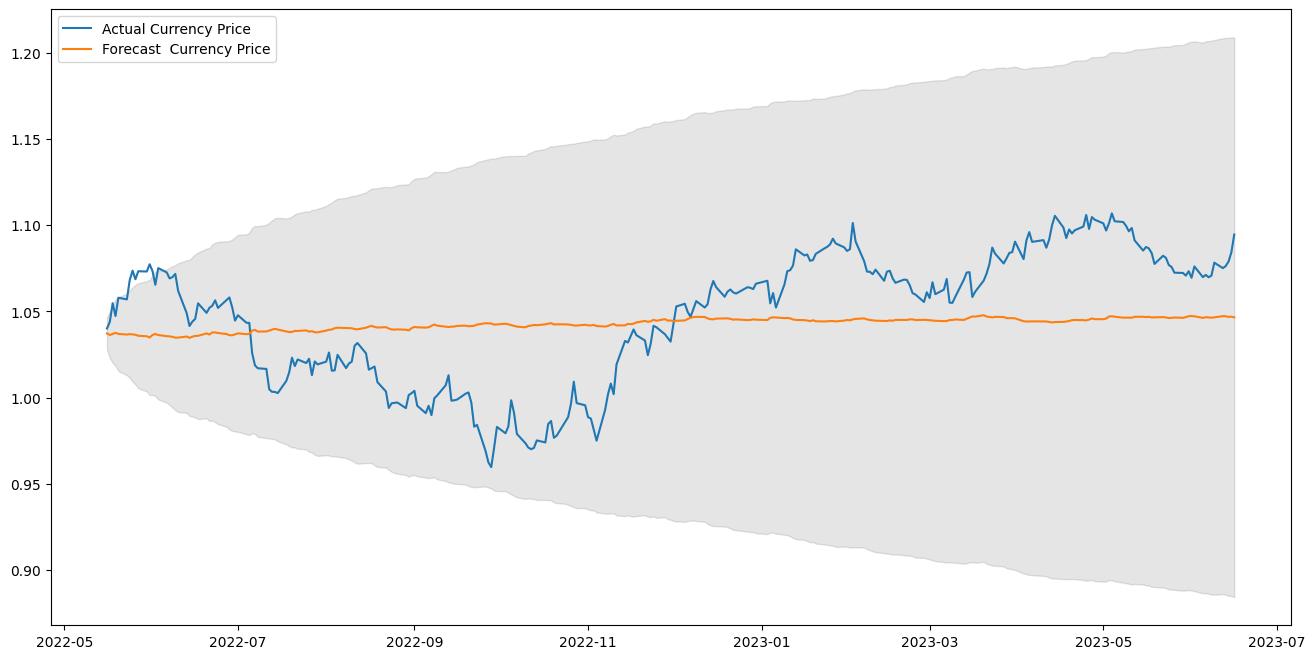

In [43]:
plt.figure(figsize=(16,8))
plt.plot(combined_data['USD_EUR_Price'],label="Actual Currency Price")
plt.plot(combined_data['Cur_Predicted_Value'],label="Forecast  Currency Price")
plt.fill_between(combined_data.index,combined_data['Cur lower'],combined_data['Cur Upper'],color='k',alpha=0.1)
plt.legend(loc="upper left")

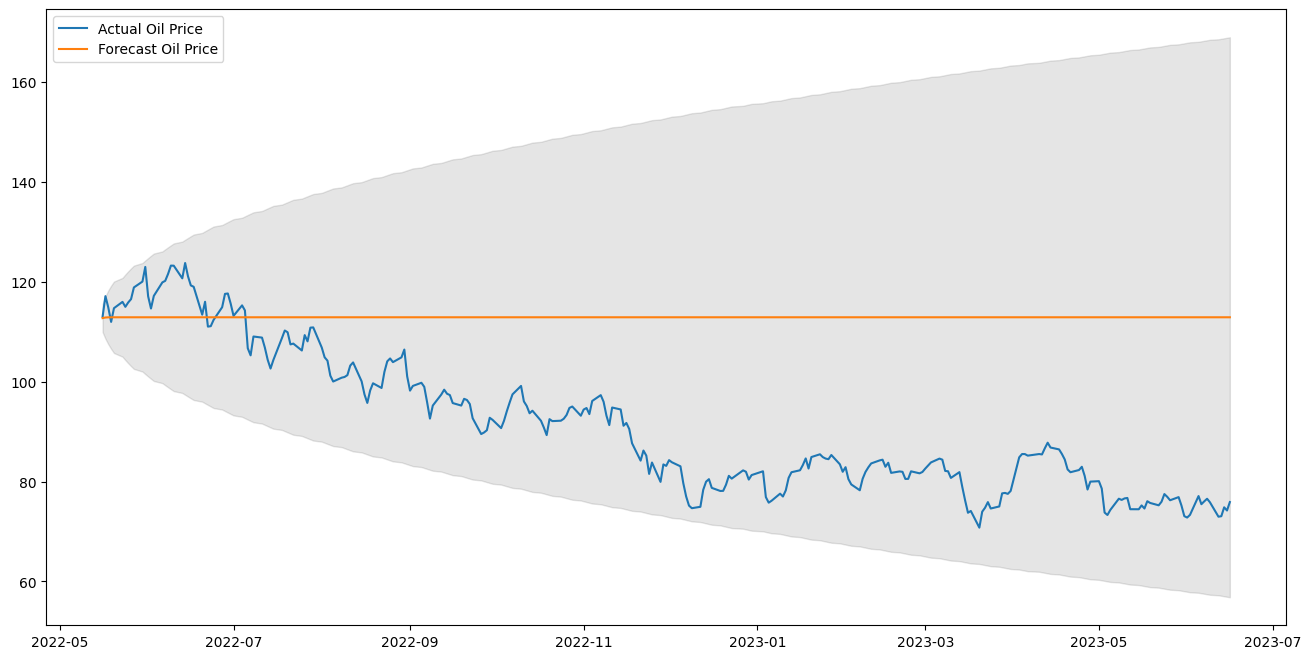

In [44]:
plt.figure(figsize=(16,8))
plt.plot(combined_data['Oil_Price'],label="Actual Oil Price")
plt.plot(combined_data['Oil_Predicted_Value'],label="Forecast Oil Price")
plt.fill_between(combined_data.index,combined_data['Oil lower'],combined_data['Oil Upper'],color='k',alpha=0.1)
plt.legend(loc="upper left")

# Model Metrics evaluation


In [56]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

def calculate_metrics(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    return {"MAE": mae, "MSE": mse, "RMSE": rmse, "MAPE": mape}



In [59]:
metrics = calculate_metrics(combined_data['USD_EUR_Price'], combined_data['Cur_Predicted_Value'])
metrics

{'MAE': 0.032110256090898286,
 'MSE': 0.0013392638257984902,
 'RMSE': 0.03659595368068019,
 'MAPE': 3.084524931127826}

In [60]:
metrics = calculate_metrics(combined_data['Oil_Price'], combined_data['Oil_Predicted_Value'])
metrics

{'MAE': 22.797115763447945,
 'MSE': 665.1521520977285,
 'RMSE': 25.79054385036749,
 'MAPE': 27.457019782051923}

#Executing model with complete dataset

In [45]:
import warnings
warnings.filterwarnings("ignore")


In [46]:

cur_model=ARIMA(selected_data['USD_EUR_Price'],order=(1,1,1),exog=selected_data['Oil_Price'])
cur_model_fit=cur_model.fit()


In [47]:

oil_model=ARIMA(selected_data['Oil_Price'],order=(1,1,1))
oil_model_fit=oil_model.fit()

In [48]:
def forecast_steps(oil_model_fit,cur_model_fit, steps):
    # Exog is None by default. If there are future values of the exogenous variable, you can pass them here.
    oil_result = oil_model_fit.forecast(steps=steps)
    result = cur_model_fit.forecast(steps=steps, exog=oil_result)
    forecast = result

    return forecast


# One Day Step Ahead

In [49]:
forecast_steps(oil_model_fit,cur_model_fit,1)

1408    1.094891
dtype: float64

# Five Days Step Ahead

In [50]:
forecast_steps(oil_model_fit,cur_model_fit,5)

1408    1.094891
1409    1.094856
1410    1.094860
1411    1.094859
1412    1.094860
Name: predicted_mean, dtype: float64